In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


In [3]:
X_train.shape

(404, 13)

In [4]:
y_train.shape

(404,)

Normalizing training and testing data

In [5]:
mean = X_train.mean(axis = 0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std

X_test -= mean
X_test /= std

In [6]:
def build_network():
    network = models.Sequential()
    network.add(layers.Dense(64, activation = "relu", input_shape = (13,)))
    network.add(layers.Dense(64, activation = "relu"))
    network.add(layers.Dense(1))
    network.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"]) # mae = MEAN ABSOLUTE ERROR
    return network

### Performing K-Fold Cross Validation

In [7]:
import numpy as np

def perform_k_fold(k = 4, num_epochs = 100):
    
    num_val_samples = len(X_train) // k
    all_scores = []
    
    for i in range(k): 
        print('processing fold #', i) 
        val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples] 
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate( [X_train[:i * num_val_samples], 
                                            X_train[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], 
                                                y_train[(i + 1) * num_val_samples:]], axis=0)
        model = build_network() 
        model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) 
        all_scores.append(val_mae)
        
    return all_scores

In [39]:
validation_score = perform_k_fold()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [42]:
np.mean(validation_score)

2.3404608

In [10]:
import numpy as np

def perform_k_fold(k = 4, num_epochs = 100):
    
    num_val_samples = len(X_train) // k
    mae_history = []
    
    for i in range(k): 
        print('processing fold #', i) 
        val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples] 
        val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate( [X_train[:i * num_val_samples], 
                                            X_train[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], 
                                                y_train[(i + 1) * num_val_samples:]], axis=0)
        model = build_network() 
        history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0,
                           validation_data = (val_data, val_targets)) 
        mae_history.append(history.history['val_loss'])
        
    return mae_history

In [11]:
mae_history = perform_k_fold()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [23]:
average_mae_history = [ np.mean([x[i] for x in mae_history]) for i in range(100)]

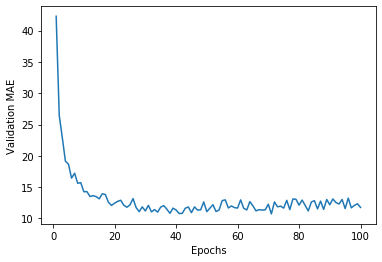

In [24]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) 
plt.xlabel('Epochs') 
plt.ylabel('Validation MAE') 
plt.show()